# Load and preprocess data

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

metrics1 = pd.read_csv('evaluation_metrics/metrics_dataset1.csv')
metrics2 = pd.read_csv('evaluation_metrics/metrics_dataset2.csv')
metrics3 = pd.read_csv('evaluation_metrics/metrics_dataset3.csv')
metrics4 = pd.read_csv('evaluation_metrics/metrics_dataset4.csv')
metrics5 = pd.read_csv('evaluation_metrics/metrics_dataset5.csv')

metrics1 = metrics1.rename(columns={'Unnamed: 0': 'i'}).set_index('i').T
metrics1['train_period'] = [i[0] for i in metrics1.index.str.split('_')]
metrics1['test_period'] = [i[1] for i in metrics1.index.str.split('_')]
metrics1['model'] = [i[2] for i in metrics1.index.str.split('_')]

metrics2 = metrics2.rename(columns={'Unnamed: 0': 'i'}).set_index('i').T
metrics2['train_period'] = [i[0] for i in metrics2.index.str.split('_')]
metrics2['test_period'] = [i[1] for i in metrics2.index.str.split('_')]
metrics2['model'] = [i[2] for i in metrics2.index.str.split('_')]

metrics3 = metrics3.rename(columns={'Unnamed: 0': 'i'}).set_index('i').T
metrics3['train_period'] = [i[0] for i in metrics3.index.str.split('_')]
metrics3['test_period'] = [i[1] for i in metrics3.index.str.split('_')]
metrics3['model'] = [i[2] for i in metrics3.index.str.split('_')]

metrics4 = metrics4.rename(columns={'Unnamed: 0': 'i'}).set_index('i').T
metrics4['train_period'] = [i[0] for i in metrics4.index.str.split('_')]
metrics4['test_period'] = [i[1] for i in metrics4.index.str.split('_')]
metrics4['model'] = [i[2] for i in metrics4.index.str.split('_')]

metrics5 = metrics5.rename(columns={'Unnamed: 0': 'i'}).set_index('i').T
metrics5['train_period'] = [i[0] for i in metrics5.index.str.split('_')]
metrics5['test_period'] = [i[1] for i in metrics5.index.str.split('_')]
metrics5['model'] = [i[2] for i in metrics5.index.str.split('_')]


train_metrics1 = pd.read_csv('evaluation_metrics/train_accuracies_d1.csv')
train_metrics1['train_period'] = [i[0] for i in train_metrics1.i.str.split('_')]
train_metrics1['test_period'] = [i[1] for i in train_metrics1.i.str.split('_')]
train_metrics1['model'] = [i[2] for i in train_metrics1.i.str.split('_')]

train_metrics2 = pd.read_csv('evaluation_metrics/train_accuracies_d2.csv')
train_metrics2['train_period'] = [i[0] for i in train_metrics2.i.str.split('_')]
train_metrics2['test_period'] = [i[1] for i in train_metrics2.i.str.split('_')]
train_metrics2['model'] = [i[2] for i in train_metrics2.i.str.split('_')]

train_metrics3 = pd.read_csv('evaluation_metrics/train_accuracies_d3.csv')
train_metrics3['train_period'] = [i[0] for i in train_metrics3.i.str.split('_')]
train_metrics3['test_period'] = [i[1] for i in train_metrics3.i.str.split('_')]
train_metrics3['model'] = [i[2] for i in train_metrics3.i.str.split('_')]

train_metrics4 = pd.read_csv('evaluation_metrics/train_accuracies_d4.csv')
train_metrics4['train_period'] = [i[0] for i in train_metrics4.i.str.split('_')]
train_metrics4['test_period'] = [i[1] for i in train_metrics4.i.str.split('_')]
train_metrics4['model'] = [i[2] for i in train_metrics4.i.str.split('_')]

train_metrics5 = pd.read_csv('evaluation_metrics/train_accuracies_d5.csv')
train_metrics5['train_period'] = [i[0] for i in train_metrics5.i.str.split('_')]
train_metrics5['test_period'] = [i[1] for i in train_metrics5.i.str.split('_')]
train_metrics5['model'] = [i[2] for i in train_metrics5.i.str.split('_')]

In [261]:
all_metrics1 = train_metrics1.merge(metrics1, left_on='i', right_on=metrics1.index)
all_metrics2 = train_metrics1.merge(metrics2, left_on='i', right_on=metrics2.index)
all_metrics3 = train_metrics1.merge(metrics3, left_on='i', right_on=metrics3.index)
all_metrics4 = train_metrics1.merge(metrics4, left_on='i', right_on=metrics4.index)
all_metrics5 = train_metrics1.merge(metrics5, left_on='i', right_on=metrics5.index)



# Build baseline model

In [276]:
import pandas as pd
import datetime
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

ohlcv_data = pd.read_csv('data/ohlcv_data.csv')
ohlcv_data = ohlcv_data.drop(columns=['Unnamed: 0', 'level_0', 'time'])
ohlcv_data = ohlcv_data.drop_duplicates(subset=['date', 'symbol'], keep='first')

fsyms = ['ETH', 'BTC', 'DOGE', 'MATIC']

from feature_engineering import build_features_TA, build_target

features = build_features_TA(ohlcv_data, fsyms)
outcomes = build_target(ohlcv_data, fsyms)

outcomes_eth = outcomes[outcomes['symbol'] == 'ETH']
outcomes_eth['date'] = outcomes_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                                
ohlcv_eth = ohlcv_data[ohlcv_data['symbol'] == 'ETH']

ohlcv_eth['date'] = (ohlcv_eth.date.apply(
                        lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
                            .replace(
                                hour=0, 
                                minute=0, 
                                second=0, 
                                microsecond=0)
                                )
                        )   



ohlcv_eth.loc[:, 'direction_past_1'] = ohlcv_eth['close'].pct_change(1).apply(lambda x: 1 if x > 0 else (0 if x < 0 else None))

momentum_preds = ohlcv_eth.shift(1)[['date' ,'direction_past_1']]
momentum_preds['date'] = momentum_preds['date'].shift(-1)
momentum_preds = momentum_preds.rename(columns={'direction_past_1': 'predicted'})
momentum_preds = momentum_preds.dropna()

y = outcomes_eth[['date' ,'direction_1']].merge(momentum_preds, on='date')

y_true = y['direction_1']
y_pred = y['predicted']

metrics_baseline = {
    'baseline': {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred)       
    }

}

baseline_metrics = pd.DataFrame(metrics_baseline).T
baseline_metrics['model'] = 'Baseline'

                                             

C:\Users\yesbo\AppData\Local\Temp\ipykernel_2100\3715608851.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes_eth['date'] = outcomes_eth.date.apply(
C:\Users\yesbo\AppData\Local\Temp\ipykernel_2100\3715608851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv_eth['date'] = (ohlcv_eth.date.apply(
C:\Users\yesbo\AppData\Local\Temp\ipykernel_2100\3715608851.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

{'baseline': {'accuracy': 0.4890453834115806,
  'precision': 0.4810810810810811,
  'f1_score': 0.4882445141065831,
  'recall': 0.49562450278440734}}

## Function to plot

In [427]:
def plot_metrics_baseline(metrics_max1, baseline_metrics, ylim=[0.3, 0.7]):
    import numpy as np

    metrics_compare = pd.concat([metrics_max1, baseline_metrics])

    barWidth = 0.15
    
    # set heights of bars
    bars1 = metrics_compare[metrics_compare.model == metrics_compare.model[0]].drop('model', axis=1).T[0].values
    bars2 = metrics_compare[metrics_compare.model == metrics_compare.model[1]].drop('model', axis=1).T[1].values
    bars3 = metrics_compare[metrics_compare.model == metrics_compare.model[2]].drop('model', axis=1).T[2].values
    bars4 = metrics_compare[metrics_compare.model == metrics_compare.model['baseline']].drop('model', axis=1).T['baseline'].values

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    # Make the plot
    plt.figure(figsize=(10, 7))

    plt.bar(r1, bars1, width=barWidth, edgecolor='white', label=metrics_compare['model'][0])
    plt.bar(r2, bars2, width=barWidth, edgecolor='white', label=metrics_compare['model'][1])
    plt.bar(r3, bars3, width=barWidth, edgecolor='white', label=metrics_compare['model'][2])
    plt.bar(r4, bars4, width=barWidth, edgecolor='white', label=metrics_compare['model']['baseline'])

    plt.xticks([r + barWidth for r in range(len(bars2))], list(metrics_compare.columns[:-1]))
    plt.ylim(ylim)
    # Create legend & Show graphic
    plt.legend()
    plt.show()

    

# Metrics for Dataset 1

## Test data metrics

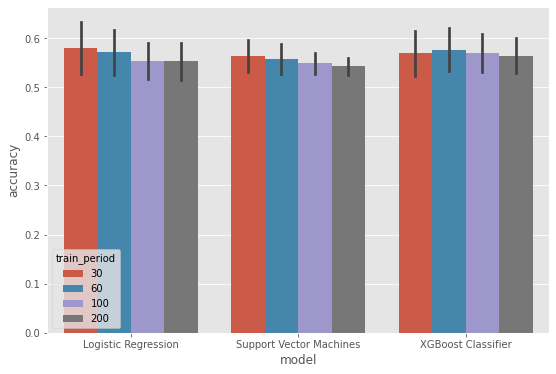

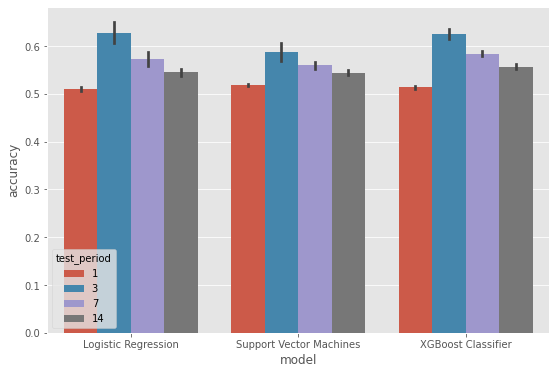

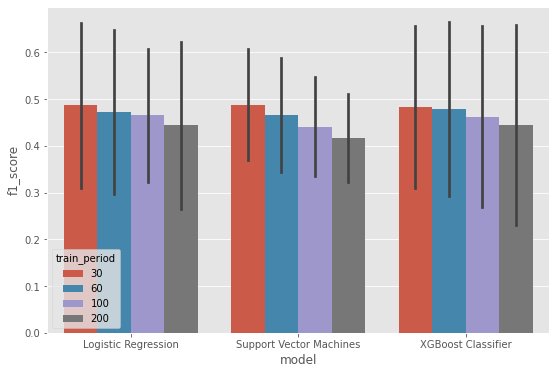

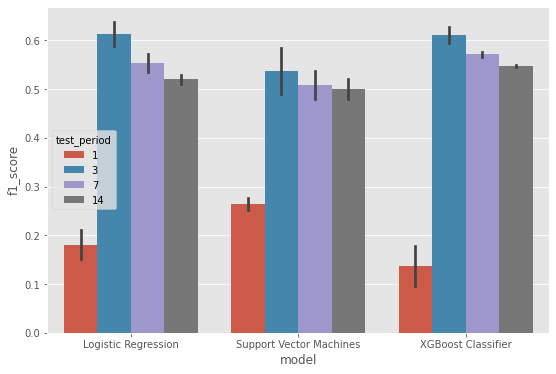

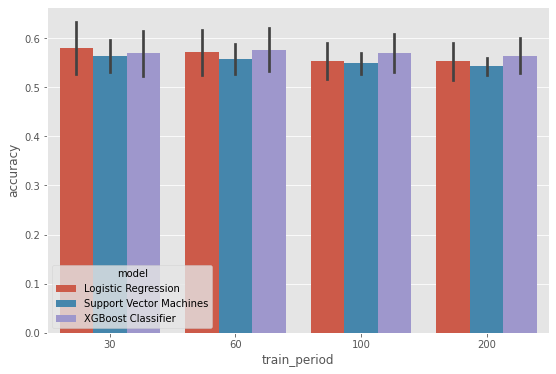

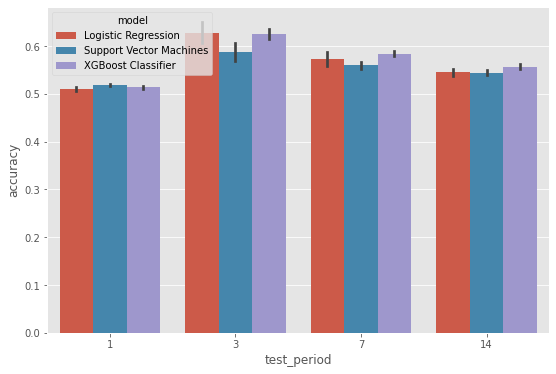

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics1, hue='train_period', ci='sd')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics1, hue='test_period', ci='sd')


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics1, hue='train_period', ci='sd')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics1, hue='test_period', ci='sd')


plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='accuracy', data=metrics1, hue='model', ci='sd')
plt.show()


plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='accuracy', data=metrics1, hue='model', ci='sd')
plt.show()




## Training data metrics

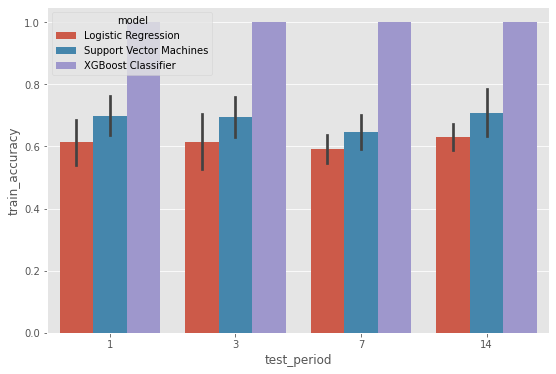

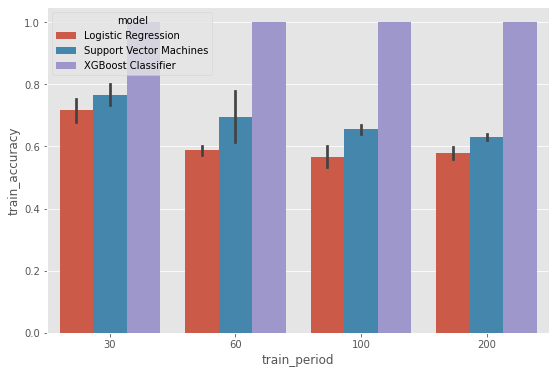

In [434]:
plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='train_accuracy', data=train_metrics1, hue='model', ci='sd')
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='train_accuracy', data=train_metrics1, hue='model', ci='sd')
plt.show()



## Compare with baseline

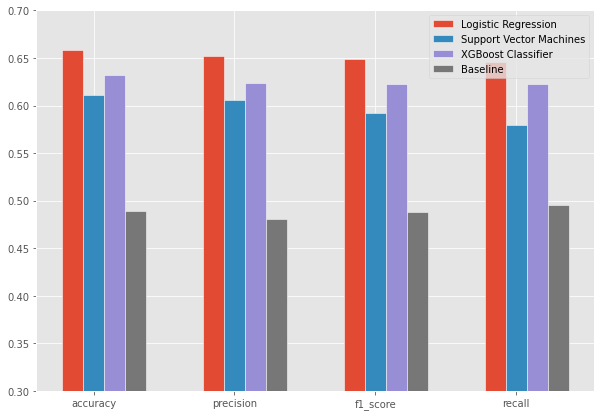

In [423]:
import matplotlib.pyplot as plt
import numpy as np


metrics_max1 = metrics1[(metrics1['train_period'] == '30') & (metrics1['test_period'] == '3')].drop(columns=['train_period', 'test_period'])
metrics_max1 = metrics_max1.reset_index().drop('index', axis=1)

plot_metrics_baseline(metrics_max1, baseline_metrics)

# metrics_compare = pd.concat([metrics_max1, baseline_metrics])

# barWidth = 0.15
 
# # set heights of bars
# bars1 = metrics_compare[metrics_compare.model == metrics_compare.model[0]].drop('model', axis=1).T[0].values
# bars2 = metrics_compare[metrics_compare.model == metrics_compare.model[1]].drop('model', axis=1).T[1].values
# bars3 = metrics_compare[metrics_compare.model == metrics_compare.model[2]].drop('model', axis=1).T[2].values
# bars4 = metrics_compare[metrics_compare.model == metrics_compare.model['baseline']].drop('model', axis=1).T['baseline'].values

# # Set position of bar on X axis
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
 
# # Make the plot
# plt.figure(figsize=(10, 7))

# plt.bar(r1, bars1, width=barWidth, edgecolor='white', label=metrics_compare['model'][0])
# plt.bar(r2, bars2, width=barWidth, edgecolor='white', label=metrics_compare['model'][1])
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label=metrics_compare['model'][2])
# plt.bar(r4, bars4, width=barWidth, edgecolor='white', label=metrics_compare['model']['baseline'])
 
# # Add xticks on the middle of the group bars
# # plt.xlabel('Metrics', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars2))], list(metrics_compare.columns[:-1]))
 
# # Create legend & Show graphic
# plt.legend()
# plt.show()


# Metrics for Dataset 2

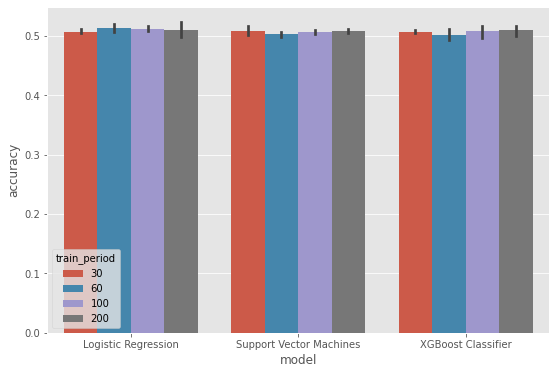

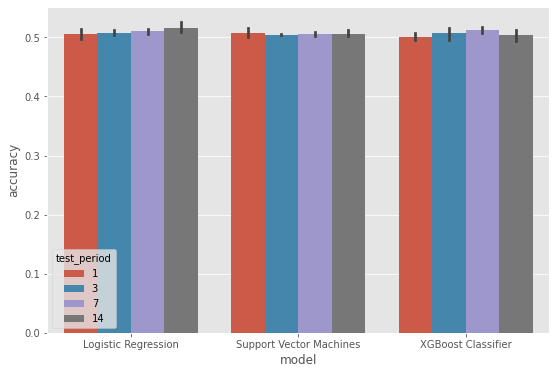

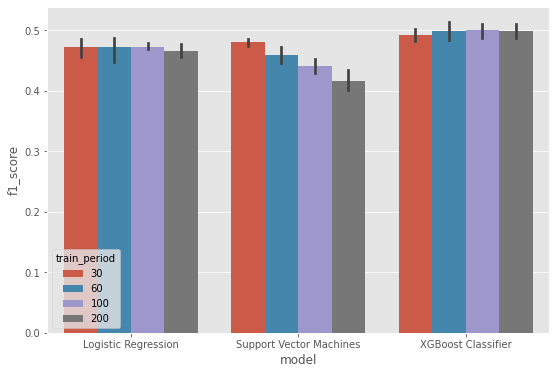

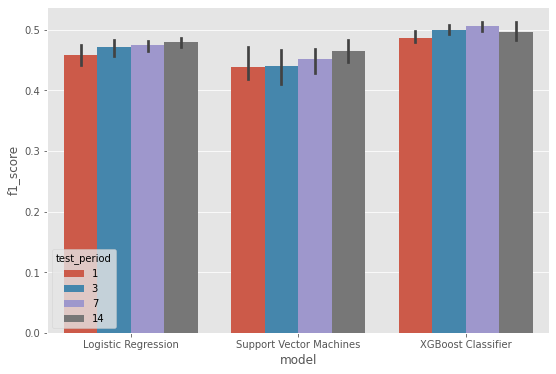

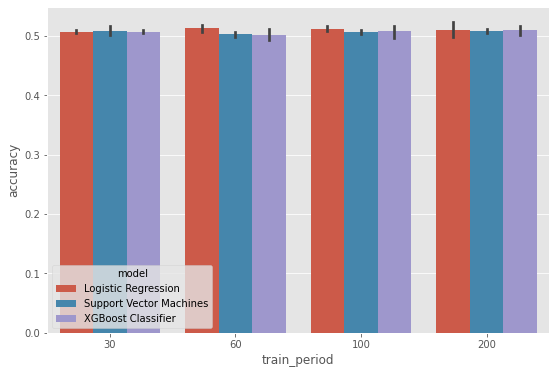

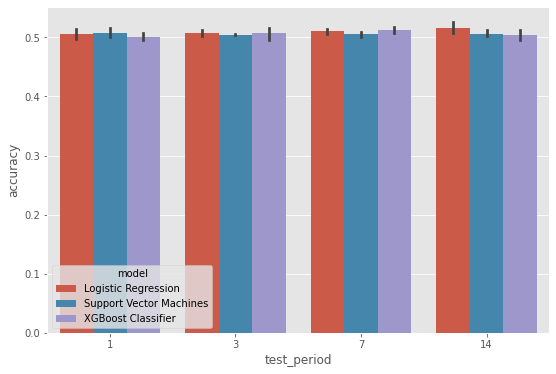

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics2, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics2, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics2, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics2, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='accuracy', data=metrics2, hue='model')
plt.show()


plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='accuracy', data=metrics2, hue='model')
plt.show()


## Training data metrics

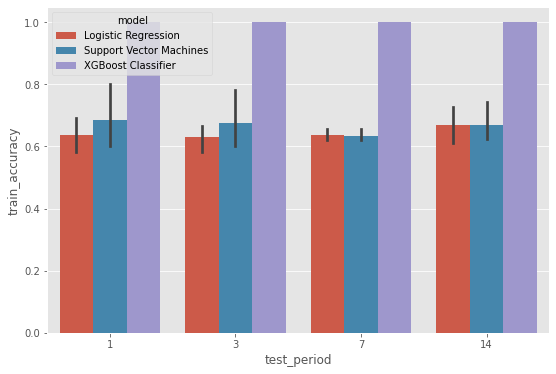

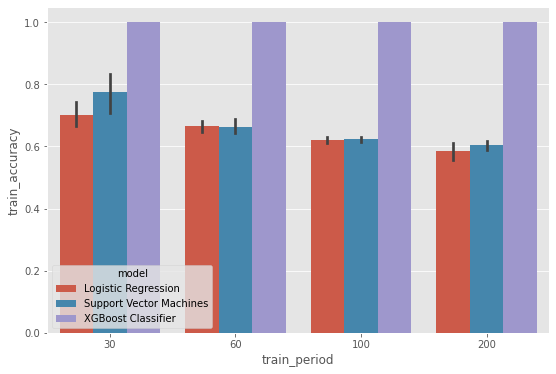

In [428]:
plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='train_accuracy', data=train_metrics2, hue='model')
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='train_accuracy', data=train_metrics2, hue='model')
plt.show()


## Compare with baseline

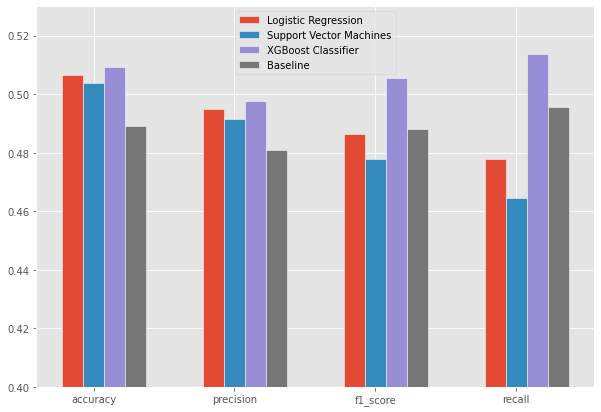

In [432]:
import matplotlib.pyplot as plt
import numpy as np


metrics_max2 = metrics2[(metrics1['train_period'] == '30') & (metrics1['test_period'] == '3')].drop(columns=['train_period', 'test_period'])
metrics_max2 = metrics_max2.reset_index().drop('index', axis=1)

plot_metrics_baseline(metrics_max2, baseline_metrics, ylim=[0.4, 0.53])



# Metrics for Dataset 3

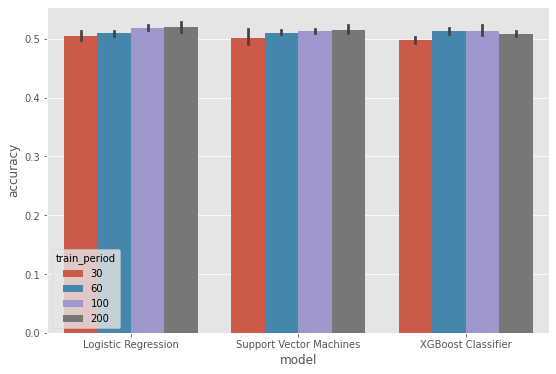

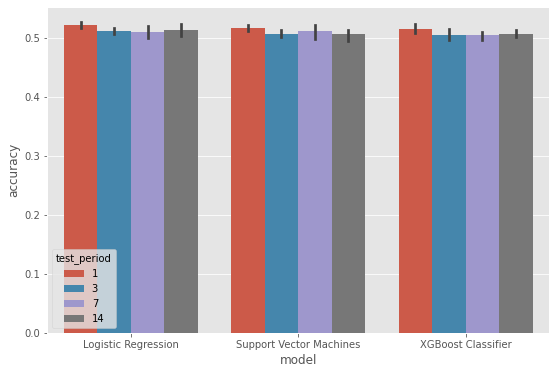

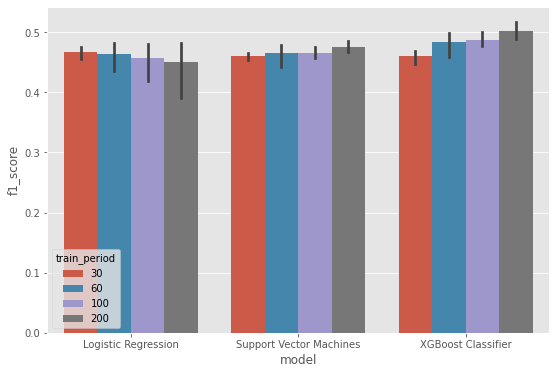

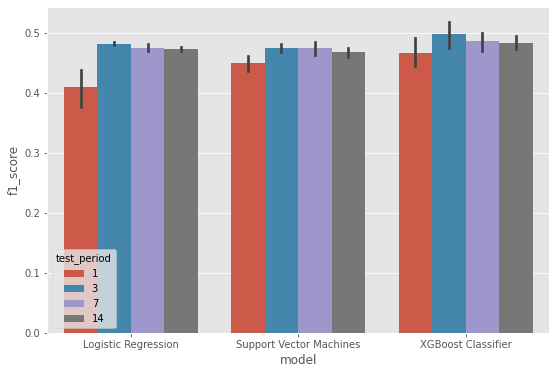

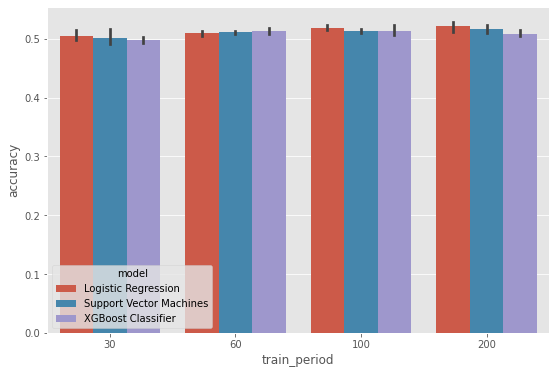

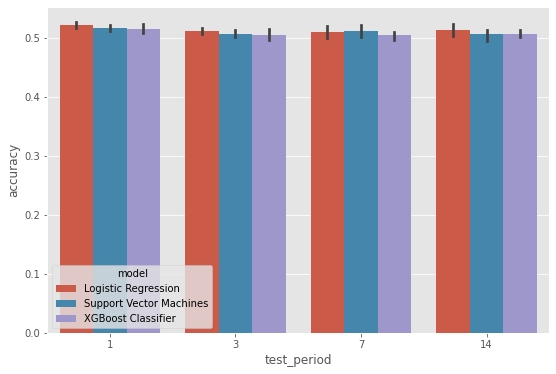

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics3, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics3, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics3, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics3, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='accuracy', data=metrics3, hue='model')
plt.show()


plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='accuracy', data=metrics3, hue='model')
plt.show()


## Training data metrics

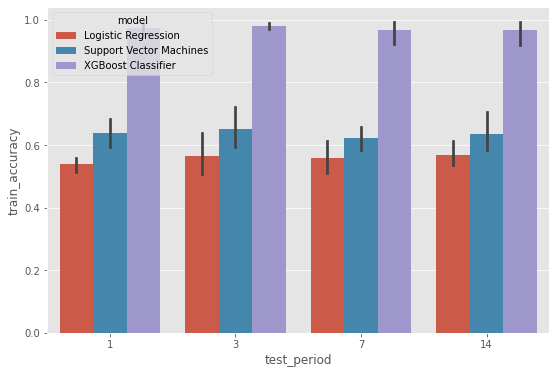

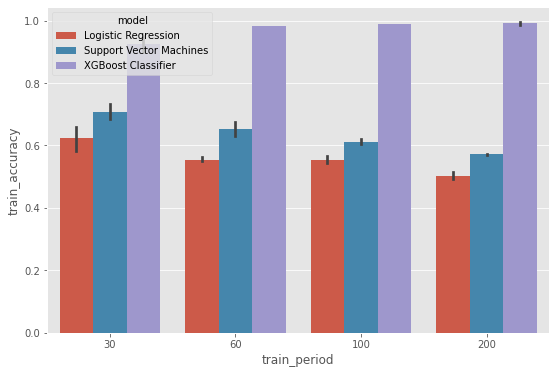

In [438]:
plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='train_accuracy', data=train_metrics3, hue='model')
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='train_accuracy', data=train_metrics3, hue='model')
plt.show()


### Compare with baseline

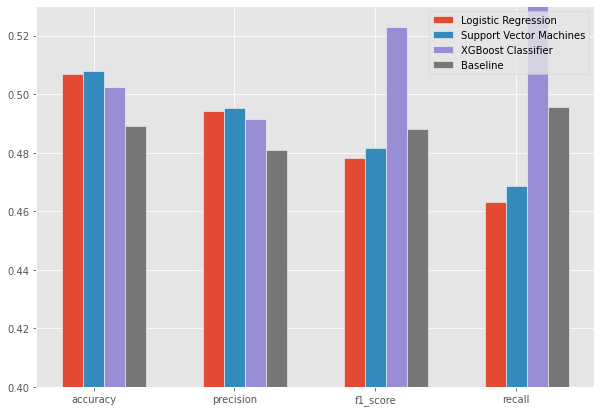

In [437]:
import matplotlib.pyplot as plt
import numpy as np


metrics_max3 = metrics3[(metrics1['train_period'] == '200') & (metrics1['test_period'] == '3')].drop(columns=['train_period', 'test_period'])
metrics_max3 = metrics_max3.reset_index().drop('index', axis=1)

plot_metrics_baseline(metrics_max3, baseline_metrics, ylim=[0.4, 0.53])



# Metrics for Dataset 4

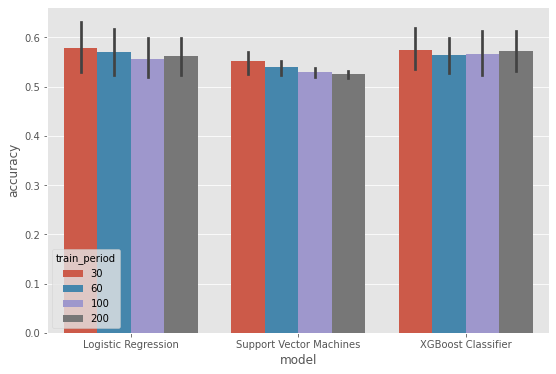

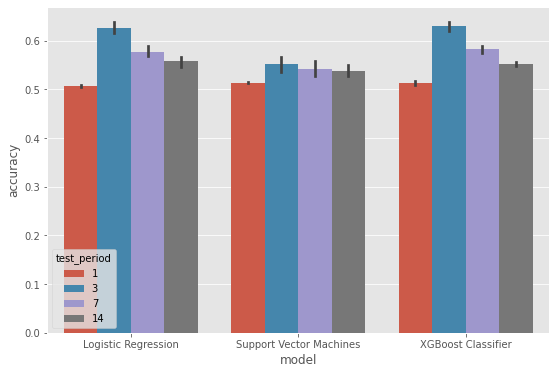

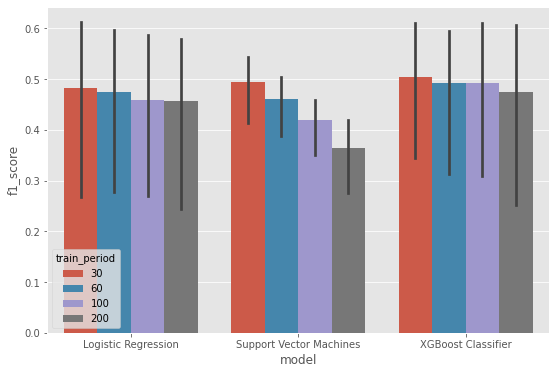

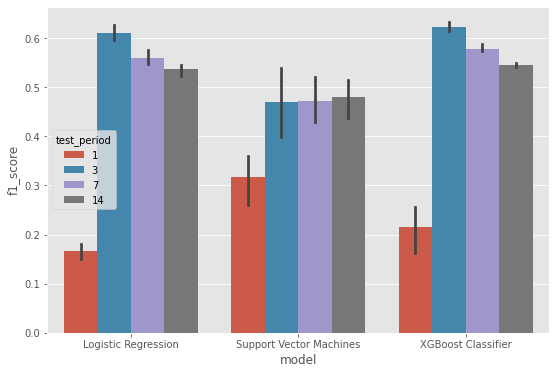

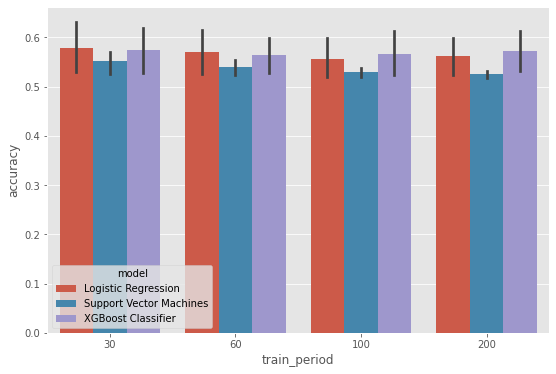

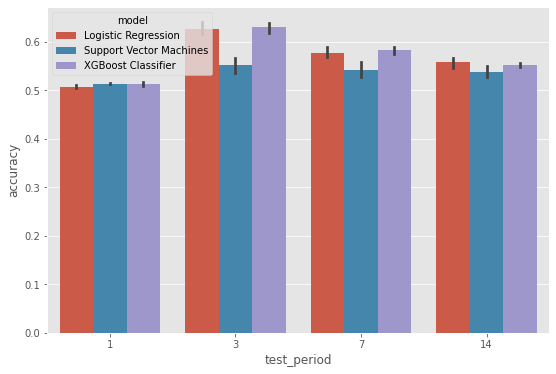

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics4, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics4, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics4, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics4, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='accuracy', data=metrics4, hue='model')
plt.show()


plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='accuracy', data=metrics4, hue='model')
plt.show()


## Training data metrics

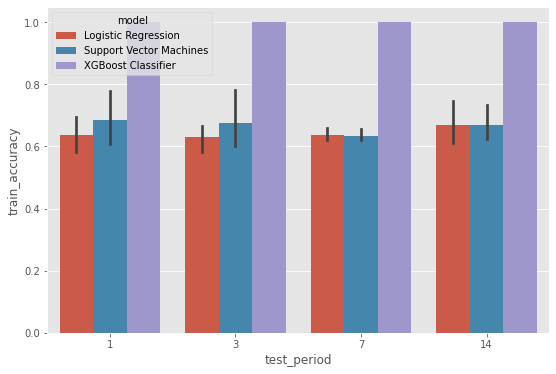

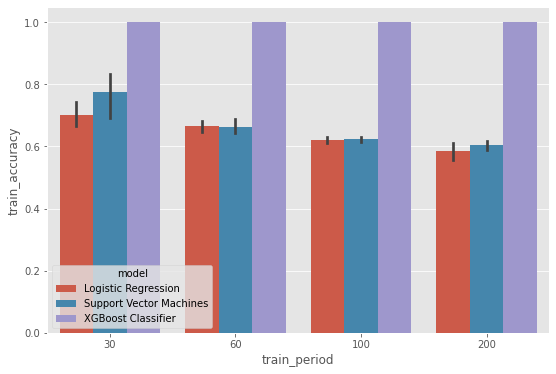

In [440]:
plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='train_accuracy', data=train_metrics2, hue='model')
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='train_accuracy', data=train_metrics2, hue='model')
plt.show()


## Compare with baseline

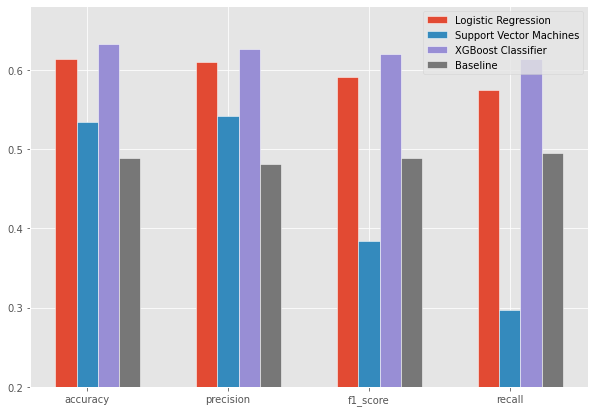

In [443]:
import matplotlib.pyplot as plt
import numpy as np


metrics_max4 = metrics4[(metrics1['train_period'] == '200') & (metrics1['test_period'] == '3')].drop(columns=['train_period', 'test_period'])
metrics_max4 = metrics_max4.reset_index().drop('index', axis=1)

plot_metrics_baseline(metrics_max4, baseline_metrics, ylim=[0.2, 0.68])



# Metrics for Dataset 5

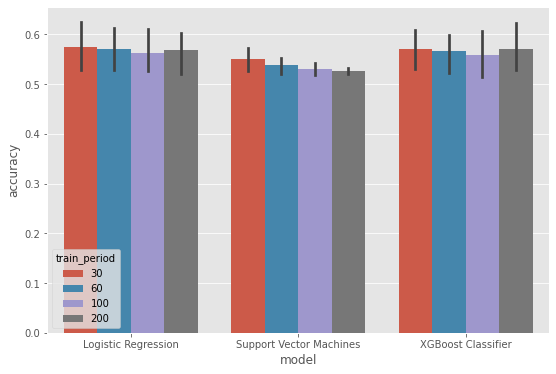

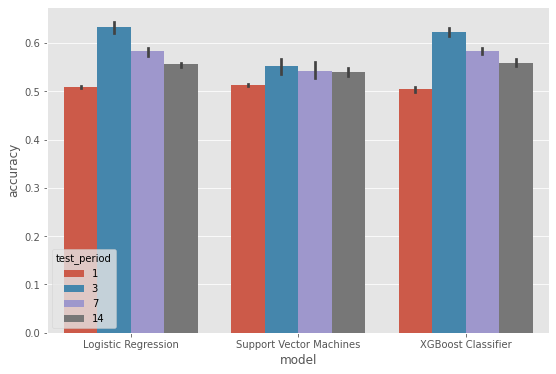

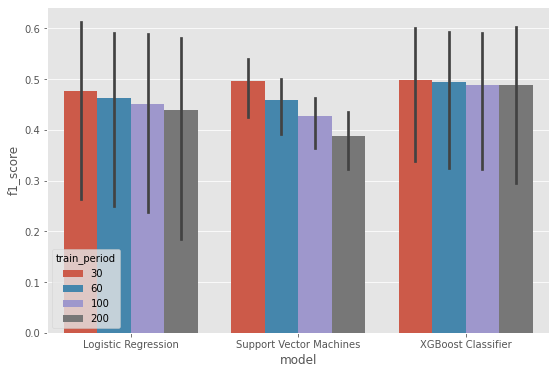

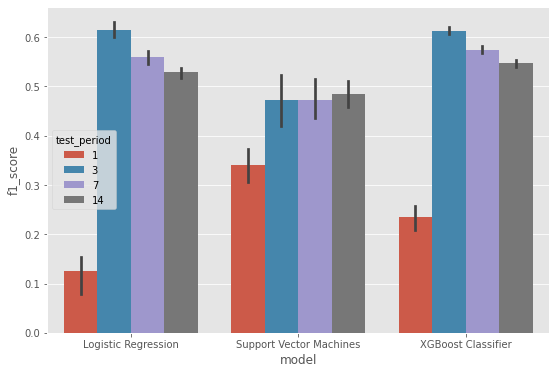

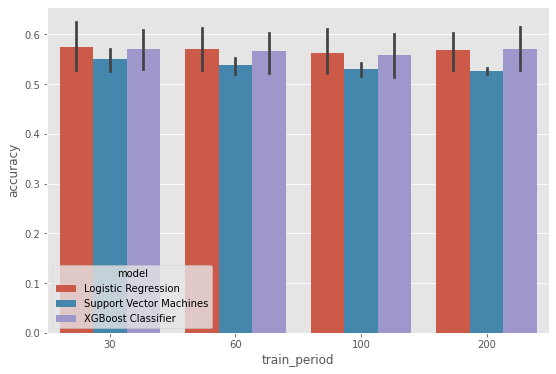

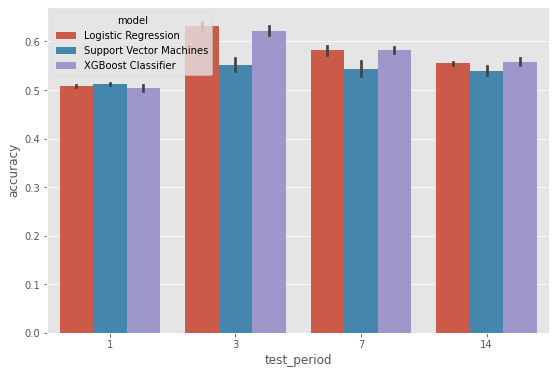

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics5, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='accuracy', data=metrics5, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics5, hue='train_period')
plt.show()
plt.figure(figsize=(9,6))
sns.barplot(x="model", y='f1_score', data=metrics5, hue='test_period')


plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='accuracy', data=metrics5, hue='model')
plt.show()


plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='accuracy', data=metrics5, hue='model')
plt.show()


## Training data metrics

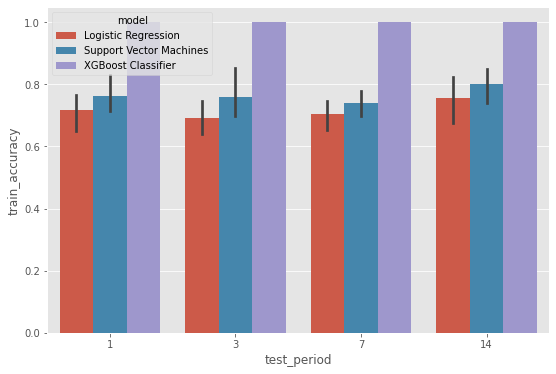

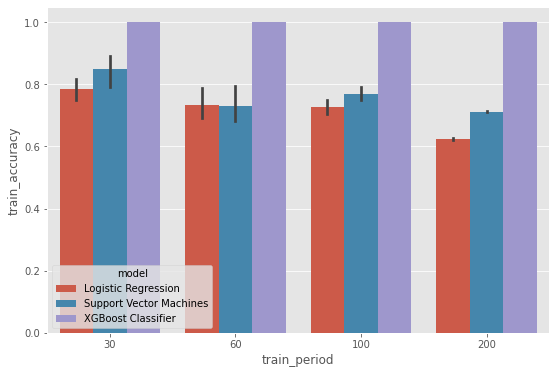

In [445]:
plt.figure(figsize=(9,6))
sns.barplot(x="test_period", y='train_accuracy', data=train_metrics5, hue='model')
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(x="train_period", y='train_accuracy', data=train_metrics5, hue='model')
plt.show()


## Compare with baseline

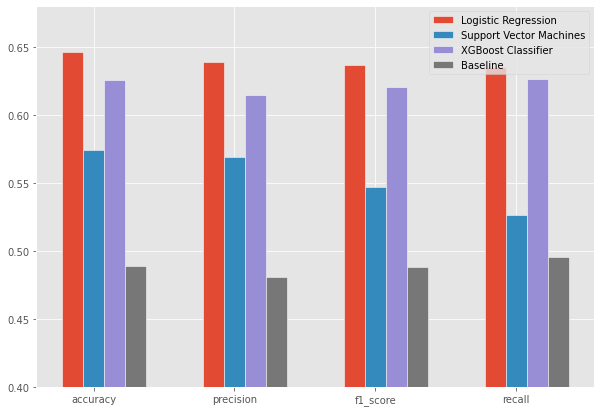

In [448]:
import matplotlib.pyplot as plt
import numpy as np


metrics_max5 = metrics5[(metrics1['train_period'] == '30') & (metrics1['test_period'] == '3')].drop(columns=['train_period', 'test_period'])
metrics_max5 = metrics_max5.reset_index().drop('index', axis=1)

plot_metrics_baseline(metrics_max5, baseline_metrics, ylim=[0.4, 0.68])

